In [1]:
import yfinance as yf

stock = "^NSEI"
stock_data= yf.download(stock, start="2022-09-11",end='2024-09-11')
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-12,17890.849609,17980.550781,17889.150391,17936.349609,17936.349609,228200
2022-09-13,18044.449219,18088.300781,18015.449219,18070.050781,18070.050781,259900
2022-09-14,17771.150391,18091.550781,17771.150391,18003.750000,18003.750000,365900
2022-09-15,18046.349609,18096.150391,17861.500000,17877.400391,17877.400391,289600
2022-09-16,17796.800781,17820.050781,17497.250000,17530.849609,17530.849609,468500
...,...,...,...,...,...,...
2024-09-04,25089.949219,25216.000000,25083.800781,25198.699219,25198.699219,253800
2024-09-05,25250.500000,25275.449219,25127.750000,25145.099609,25145.099609,222200
2024-09-06,25093.699219,25168.750000,24801.300781,24852.150391,24852.150391,311700


In [45]:
import numpy as np
stock_data['next_close'] = stock_data['Close'].shift(-1)
stock_data.dropna()
stock_data['close_class'] = np.where(stock_data["Close"] < stock_data['next_close'] , 1, 0)
stock_data

,Open,High,Low,Close,Adj Close,Volume,next_close,close_class
Date,,,,,,,,
2022-09-12,17890.849609,17980.550781,17889.150391,17936.349609,17936.349609,228200,18070.050781,1
2022-09-13,18044.449219,18088.300781,18015.449219,18070.050781,18070.050781,259900,18003.750000,0
2022-09-14,17771.150391,18091.550781,17771.150391,18003.750000,18003.750000,365900,17877.400391,0
2022-09-15,18046.349609,18096.150391,17861.500000,17877.400391,17877.400391,289600,17530.849609,0
2022-09-16,17796.800781,17820.050781,17497.250000,17530.849609,17530.849609,468500,17622.250000,1
...,...,...,...,...,...,...,...,...
2024-09-04,25089.949219,25216.000000,25083.800781,25198.699219,25198.699219,253800,25145.099609,0
2024-09-05,25250.500000,25275.449219,25127.750000,25145.099609,25145.099609,222200,24852.150391,0
2024-09-06,25093.699219,25168.750000,24801.300781,24852.150391,24852.150391,311700,24936.400391,1


# Using Naive Bayses classifier

[1]
0.6216216216216216


C:\Users\chinm\anaconda3\envs\PT\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


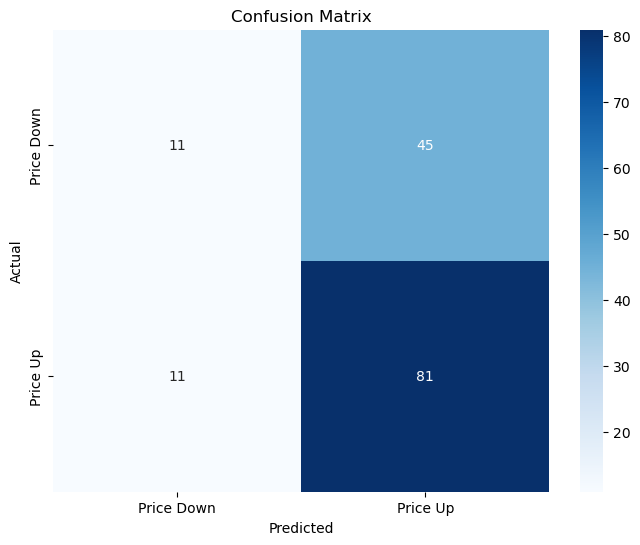

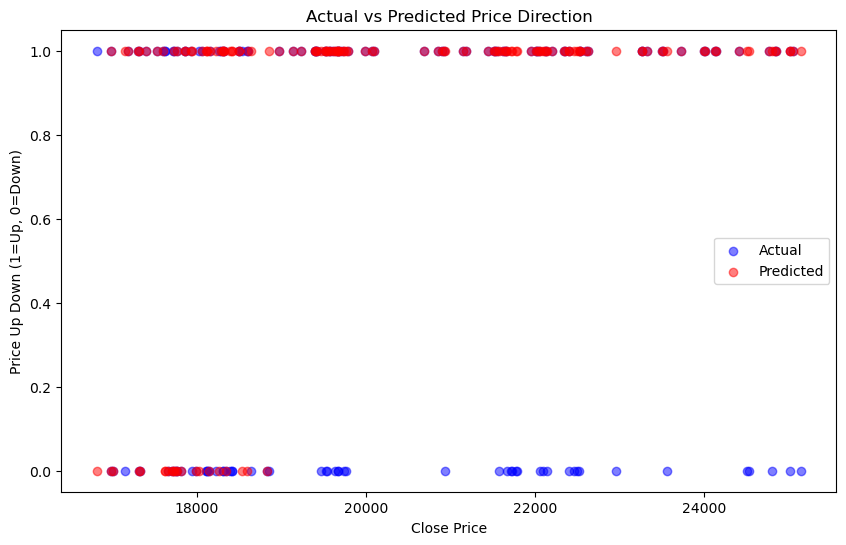

In [47]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes (continuous data)
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


X = stock_data[['Open','High','Low','Close','Volume']]

y = stock_data['close_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)
 
sin_y = gnb.predict([[25089,25216,25083,25198,253800]])
print(sin_y)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Price Down', 'Price Up'],
            yticklabels=['Price Down', 'Price Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Scatter Plot of Actual vs Predicted (for two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Close'], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test['Close'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Close Price')
plt.ylabel('Price Up Down (1=Up, 0=Down)')
plt.title('Actual vs Predicted Price Direction')
plt.legend()
plt.show()

# Using ID3 classifier

C:\Users\chinm\anaconda3\envs\PT\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[0]
Accuracy: 54.05%


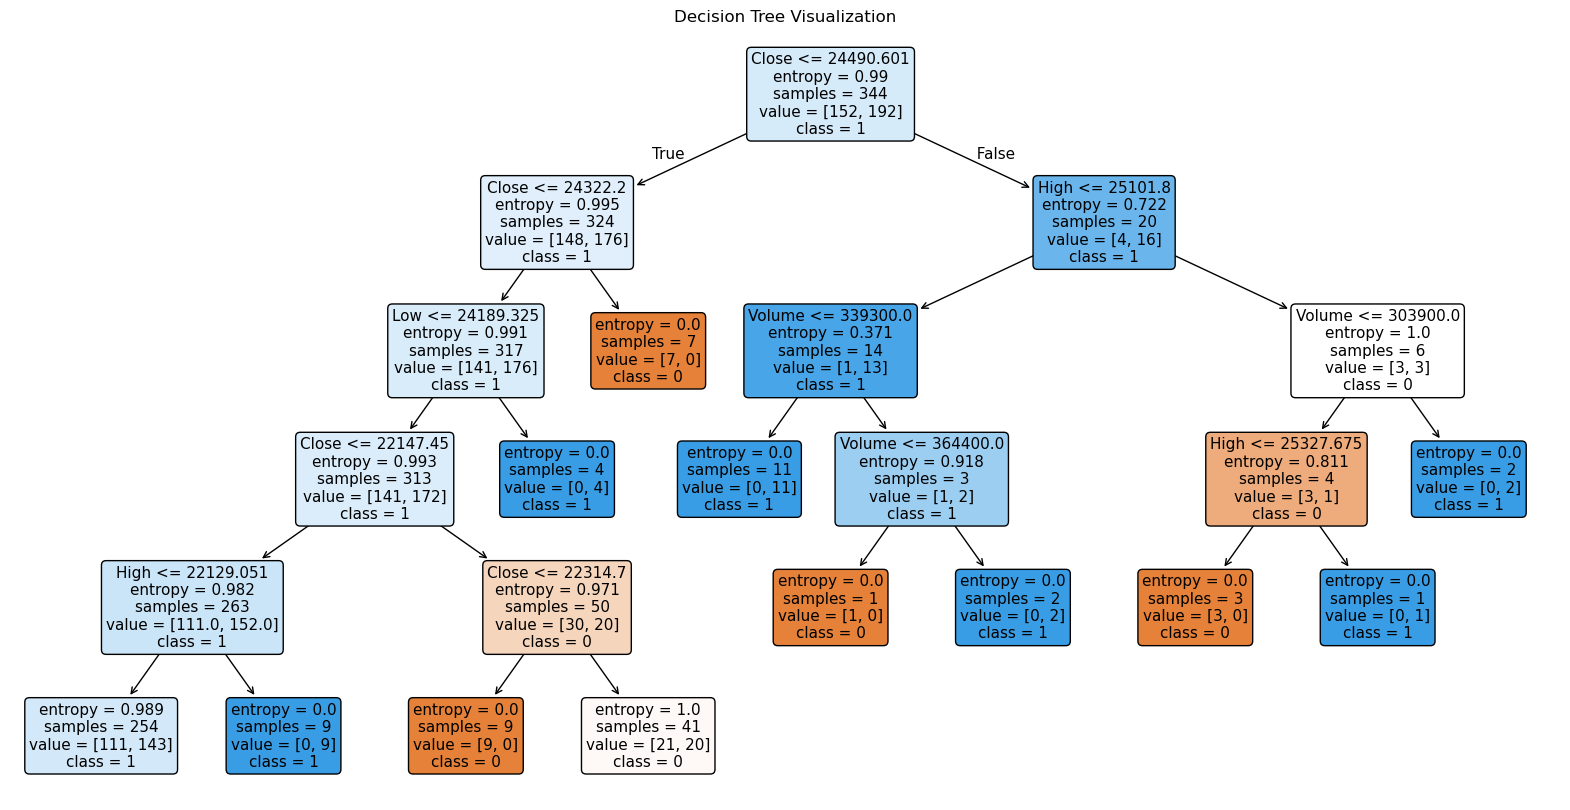

In [51]:
X = stock_data[['Open','High','Low','Close','Volume']]

y = stock_data['close_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 4: Create an ID3 Decision Tree Classifier
id3_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)

# Step 5: Train the model
id3_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = id3_model.predict(X_test)
sin_y = id3_model.predict([(25089,25216,25083,25198,253800)])
print(sin_y)

# Step 7: Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
# Convert class names to strings
class_names = [str(cls) for cls in sorted(y.unique())]
plot_tree(id3_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
